# Final Portfolio Project - Classification Task

# Teen Phone Addiction Level Classification

In [141]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing / Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    mean_absolute_error, mean_squared_error, r2_score
)

# Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

# Feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, mutual_info_regression

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [142]:
# Load the dataset
# (works both on local folder and the provided environment)
try:
    df = pd.read_csv("teen_phone_addiction_dataset.csv")
except FileNotFoundError:
    df = pd.read_csv("/mnt/data/teen_phone_addiction_dataset.csv")

print("Shape:", df.shape)
df.head()

Shape: (3000, 25)


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [143]:
# Column list (use this to write brief descriptions in the markdown section above)
pd.DataFrame({"column": df.columns, "dtype": [str(df[c].dtype) for c in df.columns]})

,column,dtype
0,ID,int64
1,Name,object
2,Age,int64
3,Gender,object
4,Location,object
5,School_Grade,object
6,Daily_Usage_Hours,float64
7,Sleep_Hours,float64
8,Academic_Performance,int64
9,Social_Interactions,int64


In [144]:
# Missing values and duplicates
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values (top):")
display(missing[missing>0].head(20))

print("\nDuplicate rows:", df.duplicated().sum())

Missing values (top):


,0



Duplicate rows: 0


In [145]:
# Basic summary statistics for numeric columns
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
ID,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Age,3000.0,15.969667,1.989489,13.0,14.00,16.0,18.00,19.0
Daily_Usage_Hours,3000.0,5.020667,1.956501,0.0,3.70,5.0,6.40,11.5
Sleep_Hours,3000.0,6.489767,1.490713,3.0,5.50,6.5,7.50,10.0
Academic_Performance,3000.0,74.947333,14.684156,50.0,62.00,75.0,88.00,100.0
Social_Interactions,3000.0,5.097667,3.139333,0.0,2.00,5.0,8.00,10.0
Exercise_Hours,3000.0,1.040667,0.734620,0.0,0.50,1.0,1.50,4.0
Anxiety_Level,3000.0,5.590000,2.890678,1.0,3.00,6.0,8.00,10.0
Depression_Level,3000.0,5.460333,2.871557,1.0,3.00,5.0,8.00,10.0
Self_Esteem,3000.0,5.546333,2.860754,1.0,3.00,6.0,8.00,10.0


In [146]:
# Inspect categorical columns
cat_cols = [c for c in df.columns if df[c].dtype == "object"]
pd.DataFrame({"categorical_column": cat_cols, "n_unique": [df[c].nunique() for c in cat_cols]})

,categorical_column,n_unique
0,Name,2933
1,Gender,3
2,Location,2726
3,School_Grade,6
4,Phone_Usage_Purpose,5


In [147]:
df = df.copy()

df["Addiction_Level"] = pd.to_numeric(df["Addiction_Level"], errors="coerce")
df = df.dropna(subset=["Addiction_Level"]).reset_index(drop=True)

# Make bins first (no labels), allowing duplicates to be dropped
tmp = pd.qcut(df["Addiction_Level"], q=3, duplicates="drop")

# How many classes did we actually get?
n_classes = tmp.cat.categories.size
print("Actual number of classes created by qcut:", n_classes)

# Assign labels based on the actual number of classes
if n_classes == 3:
    df["Addiction_Class"] = tmp.cat.rename_categories(["Low", "Medium", "High"])
elif n_classes == 2:
    df["Addiction_Class"] = tmp.cat.rename_categories(["Low", "High"])
else:
    # extreme case: almost all values identical
    df["Addiction_Class"] = "Medium"

df[["Addiction_Level", "Addiction_Class"]].head()


Actual number of classes created by qcut: 2


,Addiction_Level,Addiction_Class
0,10.0,High
1,10.0,High
2,9.2,High
3,9.8,High
4,8.6,Low


In [148]:
# FORCE overwrite features + split (run this cell once)

target = "Addiction_Class"

X = df.drop(columns=["Addiction_Class", "Addiction_Level", "ID", "Name"])
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Leakage check after overwrite:")
print("ID in X_train?", "ID" in X_train.columns)
print("Name in X_train?", "Name" in X_train.columns)
print("Addiction_Level in X_train?", "Addiction_Level" in X_train.columns)
print("Addiction_Class in X_train?", "Addiction_Class" in X_train.columns)
print("Shapes:", X_train.shape, X_test.shape)


Leakage check after overwrite:
ID in X_train? False
Name in X_train? False
Addiction_Level in X_train? False
Addiction_Class in X_train? False
Shapes: (2400, 22) (600, 22)


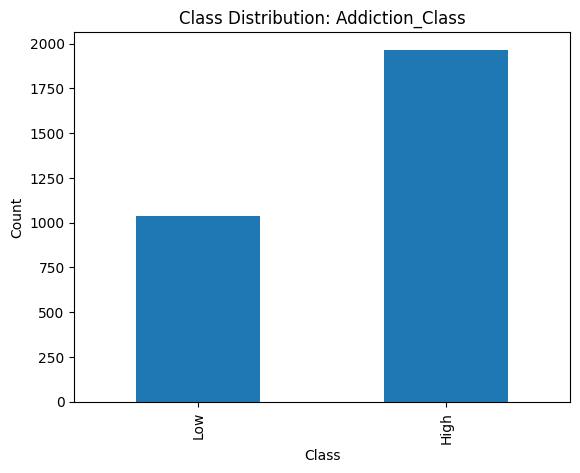

,count
Addiction_Class,
Low,1035
High,1965


In [149]:
# Class balance
class_counts = df["Addiction_Class"].value_counts().sort_index()
class_counts.plot(kind="bar")
plt.title("Class Distribution: Addiction_Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

class_counts

<Axes: >

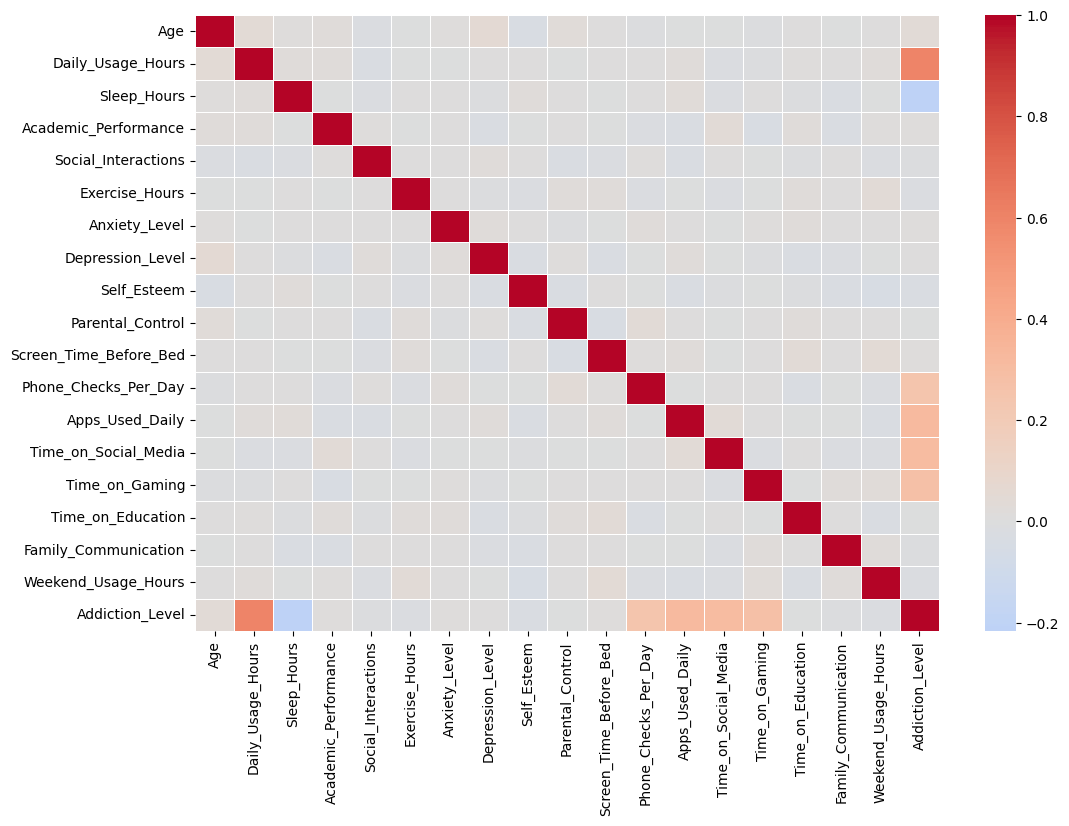

In [150]:
from pandas.api.types import is_numeric_dtype

# Select only numeric columns (safe for correlation)
num_cols = [c for c in df.columns if is_numeric_dtype(df[c]) and c != "ID"]

corr = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=False,
    linewidths=0.5
)



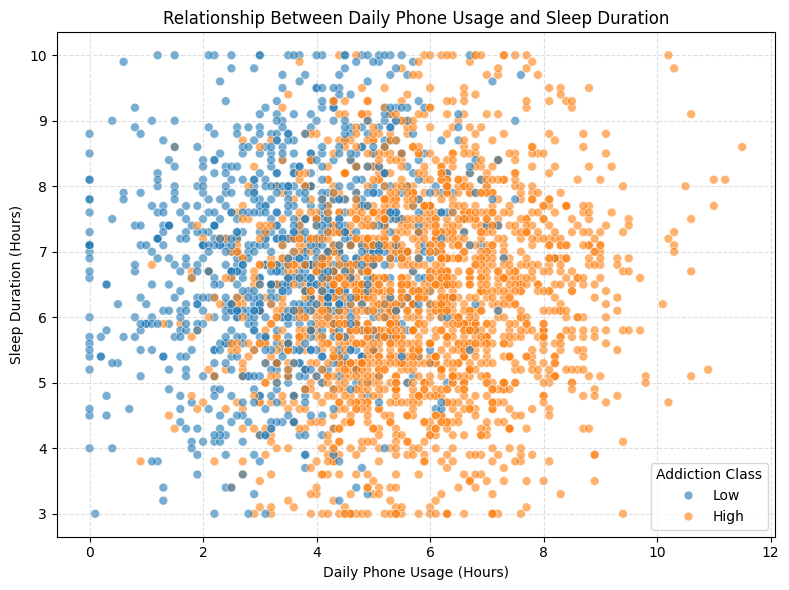

In [151]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x="Daily_Usage_Hours",
    y="Sleep_Hours",
    hue="Addiction_Class",
    alpha=0.6,
    s=40
)

plt.title("Relationship Between Daily Phone Usage and Sleep Duration", fontsize=12)
plt.xlabel("Daily Phone Usage (Hours)")
plt.ylabel("Sleep Duration (Hours)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Addiction Class")
plt.tight_layout()
plt.show()


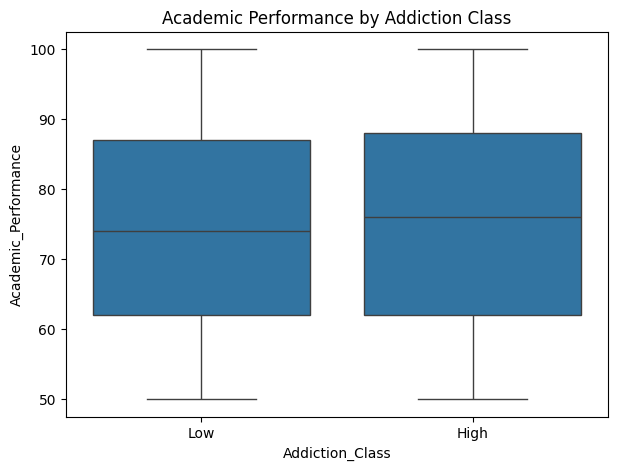

In [152]:
# Academic performance across addiction classes
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Addiction_Class", y="Academic_Performance")
plt.title("Academic Performance by Addiction Class")
plt.show()

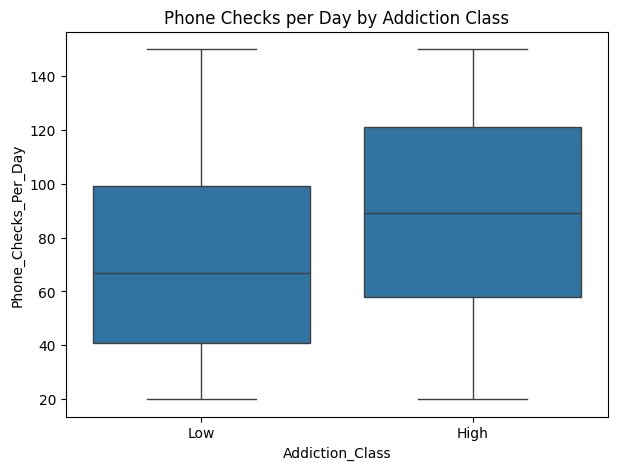

In [153]:
# Phone checks per day across addiction classes
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Addiction_Class", y="Phone_Checks_Per_Day")
plt.title("Phone Checks per Day by Addiction Class")
plt.show()

<Figure size 600x400 with 0 Axes>

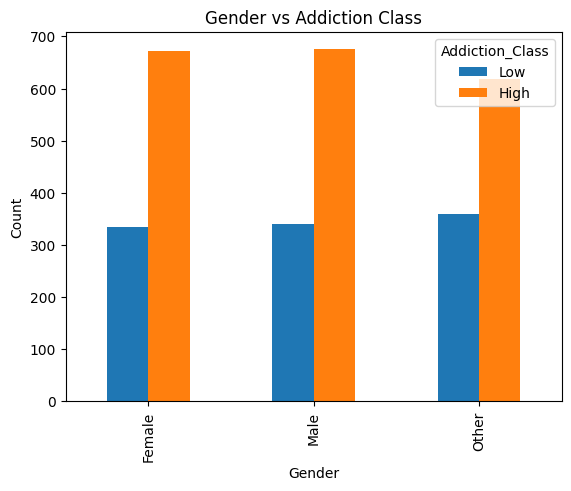

In [154]:
# Categorical distribution example: Gender vs Addiction class
plt.figure(figsize=(6,4))
pd.crosstab(df["Gender"], df["Addiction_Class"]).plot(kind="bar")
plt.title("Gender vs Addiction Class")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier

# Separate features and target (FIX leakage)
X = df.drop(columns=["Addiction_Class", "Addiction_Level", "ID", "Name"])
y = df["Addiction_Class"]

# Identify column types (based on cleaned X)
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "category"]).columns

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

# MLP classifier pipeline
mlp_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        max_iter=500,
        random_state=42
    ))
])

print("Leakage check:",
      "Addiction_Level" in X.columns,
      "ID" in X.columns,
      "Name" in X.columns)


Leakage check: False False False


In [156]:
# FORCE overwrite features + split (run this cell once)

target = "Addiction_Class"

X = df.drop(columns=["Addiction_Class", "Addiction_Level", "ID", "Name"])
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Leakage check after overwrite:")
print("ID in X_train?", "ID" in X_train.columns)
print("Name in X_train?", "Name" in X_train.columns)
print("Addiction_Level in X_train?", "Addiction_Level" in X_train.columns)
print("Addiction_Class in X_train?", "Addiction_Class" in X_train.columns)
print("Shapes:", X_train.shape, X_test.shape)


Leakage check after overwrite:
ID in X_train? False
Name in X_train? False
Addiction_Level in X_train? False
Addiction_Class in X_train? False
Shapes: (2400, 22) (600, 22)


In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [158]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def cls_metrics(y_true, y_pred, label=""):
    return pd.Series({
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (weighted)": precision_score(y_true, y_pred, average="weighted", zero_division=0),
        "Recall (weighted)": recall_score(y_true, y_pred, average="weighted", zero_division=0),
        "F1 (weighted)": f1_score(y_true, y_pred, average="weighted", zero_division=0),
    }, name=label)

# Train vs Test metrics for Logistic Regression
pred_logreg_train = final_logreg.predict(X_train)
pred_logreg_test  = final_logreg.predict(X_test)

log_train_metrics = cls_metrics(y_train, pred_logreg_train, "Train")
log_test_metrics  = cls_metrics(y_test,  pred_logreg_test,  "Test")

pd.concat([log_train_metrics, log_test_metrics], axis=1)

# Train vs Test metrics for Random Forest
pred_rf_train = final_rf.predict(X_train)
pred_rf_test  = final_rf.predict(X_test)

rf_train_metrics = cls_metrics(y_train, pred_rf_train, "Train")
rf_test_metrics  = cls_metrics(y_test,  pred_rf_test,  "Test")

pd.concat([rf_train_metrics, rf_test_metrics], axis=1)




,Train,Test
Accuracy,1.0,0.933333
Precision (weighted),1.0,0.933704
Recall (weighted),1.0,0.933333
F1 (weighted),1.0,0.932564


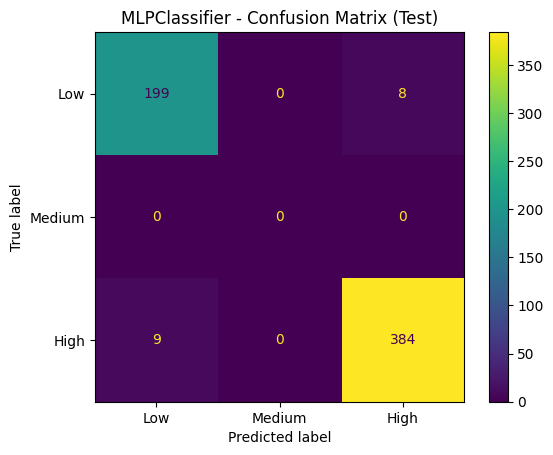

In [159]:
# Confusion matrix (test)
cm = confusion_matrix(y_test, y_pred_test, labels=["Low","Medium","High"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low","Medium","High"])
disp.plot()
plt.title("MLPClassifier - Confusion Matrix (Test)")
plt.show()

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

RANDOM_STATE = 42  # ensure consistency across models

# Logistic Regression model
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=RANDOM_STATE,
)

logreg_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", log_reg)
])

# Train
logreg_pipe.fit(X_train, y_train)

# Predict
y_pred_lr = logreg_pipe.predict(X_test)

# Evaluate
lr_metrics = cls_metrics(y_test, y_pred_lr, "Logistic Regression")
lr_metrics


,Logistic Regression
Accuracy,0.986667
Precision (weighted),0.986667
Recall (weighted),0.986667
F1 (weighted),0.986667


In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Model B: Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=300,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", rf_clf)
])

# Train
rf_pipe.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipe.predict(X_test)

# Evaluate
rf_metrics = cls_metrics(y_test, y_pred_rf, "Random Forest")
rf_metrics


,Random Forest
Accuracy,0.850000
Precision (weighted),0.873963
Recall (weighted),0.850000
F1 (weighted),0.837732


In [181]:
# Initial comparison table (test set)
initial_comparison = pd.DataFrame([lr_metrics, rf_metrics]).reset_index().rename(columns={"index":"Model"})
initial_comparison

,Model,Accuracy,Precision (weighted),Recall (weighted),F1 (weighted)
0,Logistic Regression,0.986667,0.986667,0.986667,0.986667
1,Random Forest,0.850000,0.873963,0.850000,0.837732


In [182]:
from pandas.api.types import is_numeric_dtype
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# split feature types
num_cols = [c for c in X_train.columns if is_numeric_dtype(X_train[c])]
cat_cols = [c for c in X_train.columns if c not in num_cols]

# numeric pipeline
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# categorical pipeline
cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
)


In [183]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logreg_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ))
])

logreg_param_grid = {
    "model__C": [0.1, 1, 5, 10],
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs"]
}

logreg_gs = GridSearchCV(
    estimator=logreg_pipe,
    param_grid=logreg_param_grid,
    scoring="f1_weighted",
    cv=cv,
    n_jobs=-1,
    error_score="raise"
)

logreg_gs.fit(X_train, y_train)

logreg_gs.best_params_, logreg_gs.best_score_


({'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'},
 np.float64(0.9871078803981549))

In [186]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 4.2 Random Forest tuning
rf_param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

# Use stratified CV for classification (keeps class balance in folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

rf_gs = GridSearchCV(
    estimator=rf_pipe,
    param_grid=rf_param_grid,
    scoring="f1_weighted",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    error_score="raise"
)

rf_gs.fit(X_train, y_train)

print("Best Params:", rf_gs.best_params_)
print("Best CV F1 (weighted):", rf_gs.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 400}
Best CV F1 (weighted): 0.8200381926237235


In [187]:
best_rf = rf_gs.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
best_rf_metrics = cls_metrics(y_test, y_pred_best_rf, "Tuned Random Forest")
best_rf_metrics


,Tuned Random Forest
Accuracy,0.848333
Precision (weighted),0.874773
Recall (weighted),0.848333
F1 (weighted),0.835280


In [188]:
# 4.3 Summary of best hyperparameters and CV scores
pd.DataFrame([
    {"Model": "Logistic Regression", "Best CV Score (F1w)": logreg_gs.best_score_, "Best Params": logreg_gs.best_params_},
    {"Model": "Random Forest", "Best CV Score (F1w)": rf_gs.best_score_, "Best Params": rf_gs.best_params_},
])

,Model,Best CV Score (F1w),Best Params
0,Logistic Regression,0.987108,"{'model__C': 10, 'model__penalty': 'l2', 'mode..."
1,Random Forest,0.820038,"{'model__max_depth': None, 'model__min_samples..."


In [189]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Choose k based on feature space size (after one-hot encoding)
k_best = 20

# Feature selection + Logistic Regression
fs_logreg_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k_best)),
    ("model", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
])

# Feature selection + Random Forest
fs_rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k_best)),
    ("model", RandomForestClassifier(
        random_state=RANDOM_STATE,
        n_estimators=300,
        n_jobs=-1
    ))
])

# Cross-validated performance (weighted F1)
fs_logreg_cv = cross_val_score(
    fs_logreg_pipe,
    X_train,
    y_train,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
).mean()

fs_rf_cv = cross_val_score(
    fs_rf_pipe,
    X_train,
    y_train,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
).mean()

fs_logreg_cv, fs_rf_cv


(np.float64(0.989567878991114), np.float64(0.9152019807668059))

In [190]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [196]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

assert "rf_gs" in globals(), "Run Random Forest GridSearch (rf_gs) before building final_rf"

# Final Logistic Regression with best hyperparameters + feature selection
final_logreg = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k_best)),
    ("model", LogisticRegression(
        max_iter=1000,
        random_state=RANDOM_STATE,
        C=logreg_gs.best_params_["model__C"],
        penalty=logreg_gs.best_params_["model__penalty"],
        solver=logreg_gs.best_params_["model__solver"],
    ))
])

# Final Random Forest with best hyperparameters + feature selection
bp = rf_gs.best_params_

final_rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k_best)),
    ("model", RandomForestClassifier(
        random_state=RANDOM_STATE,
        n_jobs=-1,
        n_estimators=bp["model__n_estimators"],
        max_depth=bp["model__max_depth"],
        min_samples_split=bp["model__min_samples_split"],
        min_samples_leaf=bp["model__min_samples_leaf"],
    ))
])

# Fit final models
final_logreg.fit(X_train, y_train)
final_rf.fit(X_train, y_train)

# Predictions
pred_logreg = final_logreg.predict(X_test)
pred_rf = final_rf.predict(X_test)

# Evaluation
final_lr_metrics = cls_metrics(y_test, pred_logreg, "Final Logistic Regression")
final_rf_metrics = cls_metrics(y_test, pred_rf, "Final Random Forest")

final_lr_metrics, final_rf_metrics


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

(Accuracy                0.990000
 Precision (weighted)    0.990001
 Recall (weighted)       0.990000
 F1 (weighted)           0.989988
 Name: Final Logistic Regression, dtype: float64,
 Accuracy                0.933333
 Precision (weighted)    0.933704
 Recall (weighted)       0.933333
 F1 (weighted)           0.932564
 Name: Final Random Forest, dtype: float64)

In [174]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# scorer
f1_weighted = make_scorer(f1_score, average="weighted")

# stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# compute CV score for final_rf
rf_cv_score = cross_val_score(final_rf, X_train, y_train, cv=cv, scoring=f1_weighted, n_jobs=-1).mean()

rf_cv_score


np.float64(nan)

In [175]:
from sklearn.model_selection import cross_validate, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

cv_debug = cross_validate(
    final_rf,
    X_train, y_train,
    cv=cv,
    scoring="f1_weighted",
    n_jobs=-1,
    error_score="raise",
    return_train_score=False
)

cv_debug["test_score"].mean()


np.float64(0.916792257401706)

In [198]:
rf_cv_score = cv_debug["test_score"].mean()

comparison_table = pd.DataFrame([
    {
        "Model": "Logistic Regression (Final)",
        "Features": f"SelectKBest(k={k_best})",
        "CV Score (F1w)": logreg_gs.best_score_,
        "Accuracy": final_lr_metrics["Accuracy"],
        "Precision": final_lr_metrics["Precision (weighted)"],
        "Recall": final_lr_metrics["Recall (weighted)"],
        "F1-Score": final_lr_metrics["F1 (weighted)"],
    },
    {
        "Model": "Random Forest (Final)",
        "Features": f"SelectKBest(k={k_best})",
        "CV Score (F1w)": rf_cv_score,
        "Accuracy": final_rf_metrics["Accuracy"],
        "Precision": final_rf_metrics["Precision (weighted)"],
        "Recall": final_rf_metrics["Recall (weighted)"],
        "F1-Score": final_rf_metrics["F1 (weighted)"],
    }
])

comparison_table


,Model,Features,CV Score (F1w),Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Final),SelectKBest(k=20),0.987108,0.990000,0.990001,0.990000,0.989988
1,Random Forest (Final),SelectKBest(k=20),0.916792,0.933333,0.933704,0.933333,0.932564


In [201]:
# Create final comparison table (TEST SET)

comparison_table = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Accuracy": final_lr_metrics["Accuracy"],
        "Precision (weighted)": final_lr_metrics["Precision (weighted)"],
        "Recall (weighted)": final_lr_metrics["Recall (weighted)"],
        "F1 (weighted)": final_lr_metrics["F1 (weighted)"],
    },
    {
        "Model": "Random Forest",
        "Accuracy": final_rf_metrics["Accuracy"],
        "Precision (weighted)": final_rf_metrics["Precision (weighted)"],
        "Recall (weighted)": final_rf_metrics["Recall (weighted)"],
        "F1 (weighted)": final_rf_metrics["F1 (weighted)"],
    }
])

comparison_table


,Model,Accuracy,Precision (weighted),Recall (weighted),F1 (weighted)
0,Logistic Regression,0.990000,0.990001,0.990000,0.989988
1,Random Forest,0.933333,0.933704,0.933333,0.932564
